In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
path = 'Youtube_Data_final_45000.csv' 
df = pd.read_csv(path, lineterminator='\n') #/content/drive/MyDrive/Youtube_Data_final.csv
df = df.drop('Unnamed: 0', axis = 1)
df.shape

(5007, 18)

In [ ]:
df['log']=0
df['v']=0
df['recommendation']=0
df['camping']=0
df['daily']=0
df.loc[df['title'].str.contains('로그'),'log']= 1
df.loc[df['title'].str.contains('브이'),'v']= 1
df.loc[df['title'].str.contains('추천'),'recommendation']= 1
df.loc[df['title'].str.contains('캠핑'),'camping']= 1
df.loc[df['title'].str.contains('일상'),'daily']= 1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import timedelta

In [ ]:
df.columns

Index(['title', 'title_length', 'categoryId', 'likes', 'comments',
       'publishedAt', 'spring', 'summer', 'autumn', 'winter', 'day', 'night',
       'durations_1~4', 'durations_5~9', 'durations_10~14', 'durations_15~19',
       'durations_20~', 'views', 'log', 'v', 'recommendation', 'camping',
       'daily'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5007 entries, 0 to 5006
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            5007 non-null   object 
 1   title_length     5007 non-null   int64  
 2   categoryId       5007 non-null   int64  
 3   likes            5007 non-null   float64
 4   comments         5007 non-null   float64
 5   publishedAt      5007 non-null   object 
 6   spring           5007 non-null   int64  
 7   summer           5007 non-null   int64  
 8   autumn           5007 non-null   int64  
 9   winter           5007 non-null   int64  
 10  day              5007 non-null   int64  
 11  night            5007 non-null   int64  
 12  durations_1~4    5007 non-null   int64  
 13  durations_5~9    5007 non-null   int64  
 14  durations_10~14  5007 non-null   int64  
 15  durations_15~19  5007 non-null   int64  
 16  durations_20~    5007 non-null   int64  
 17  views         

In [ ]:
df.describe()

,title_length,categoryId,likes,comments,spring,summer,autumn,winter,day,night,...,durations_5~9,durations_10~14,durations_15~19,durations_20~,views,log,v,recommendation,camping,daily
count,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,...,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000
mean,46.247054,21.754544,309.360296,59.875774,0.431396,0.127821,0.173557,0.267226,0.756741,0.243259,...,0.354304,0.211304,0.094268,0.080288,14758.239864,0.081086,0.069702,0.044937,0.027162,0.035351
std,22.515274,3.672014,327.542383,84.534353,0.495321,0.333924,0.378766,0.442555,0.429093,0.429093,...,0.478350,0.408274,0.292230,0.271765,11325.496991,0.272995,0.254670,0.207187,0.162571,0.184683
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,20.000000,90.000000,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5253.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,22.000000,217.000000,38.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,11851.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,24.000000,431.000000,74.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,21744.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,27.000000,4197.000000,1868.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,44978.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
norm_df = df
norm_df['title_length'] = (df['title_length'] - df['title_length'].min())/(df['title_length'].max() - df['title_length'].min())
norm_df['likes'] = (df['likes'] - df['likes'].min())/(df['likes'].max() - df['likes'].min())
norm_df['comments'] = (df['comments'] - df['comments'].min())/(df['comments'].max() - df['comments'].min())
norm_df['views'] = (df['views'] - df['views'].min())/(df['views'].max() - df['views'].min())
norm_df.head()

,title,title_length,categoryId,likes,comments,publishedAt,spring,summer,autumn,winter,...,durations_5~9,durations_10~14,durations_15~19,durations_20~,views,log,v,recommendation,camping,daily
0,[이도현] 바자맨타이완 커버 화보 촬영 현장 비하인드,0.275510,24,0.048368,0.013383,2022-03-24 07:11:06,1,0,0,0,...,0,0,0,0,0.011529,0,0,0,0,0
1,[이도현] 컨디션 광고 환생연애 촬영 현장 비하인드,0.265306,24,0.143198,0.024090,2022-01-13 06:00:07,0,0,0,1,...,0,0,0,0,0.148123,0,0,0,0,0
2,YENA - 2022 SEASON'S GREETING BEHIND,0.357143,24,1.000000,0.138651,2021-12-08 10:00:18,0,0,0,1,...,0,0,0,0,0.652659,0,0,0,0,0
3,[최예나] 'YENA'S BIRTHDAY Photo Book' Behind,0.397959,24,0.695020,0.144004,2021-10-08 09:00:11,0,0,1,0,...,0,0,0,0,0.404757,0,0,0,0,0
4,[이도현] SSF SHOP 세상이 사랑하는 패션 광고 촬영 현장 비하인드,0.387755,24,0.100786,0.015525,2021-10-07 07:00:12,0,0,1,0,...,0,0,0,0,0.087932,0,0,0,0,0


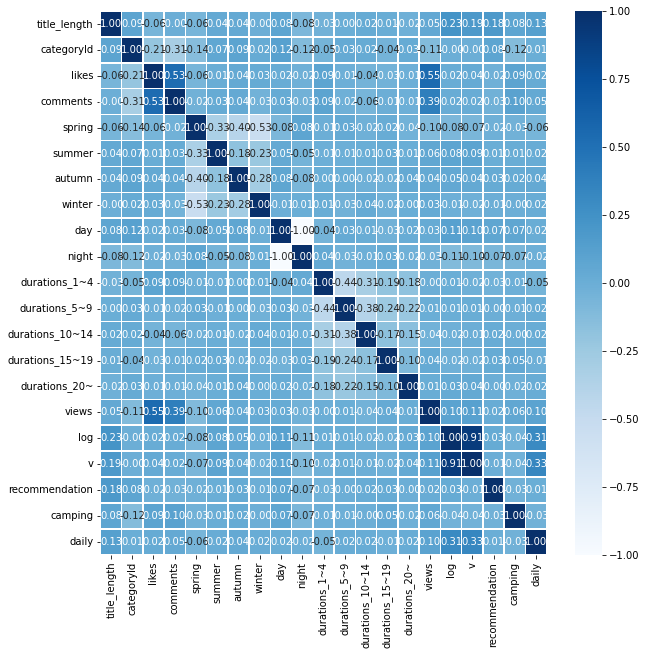

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data = norm_df.loc[df["views"] <= 1000000].corr(method="pearson"), annot = True, fmt = ".2f", linewidths = .5, cmap = "Blues");

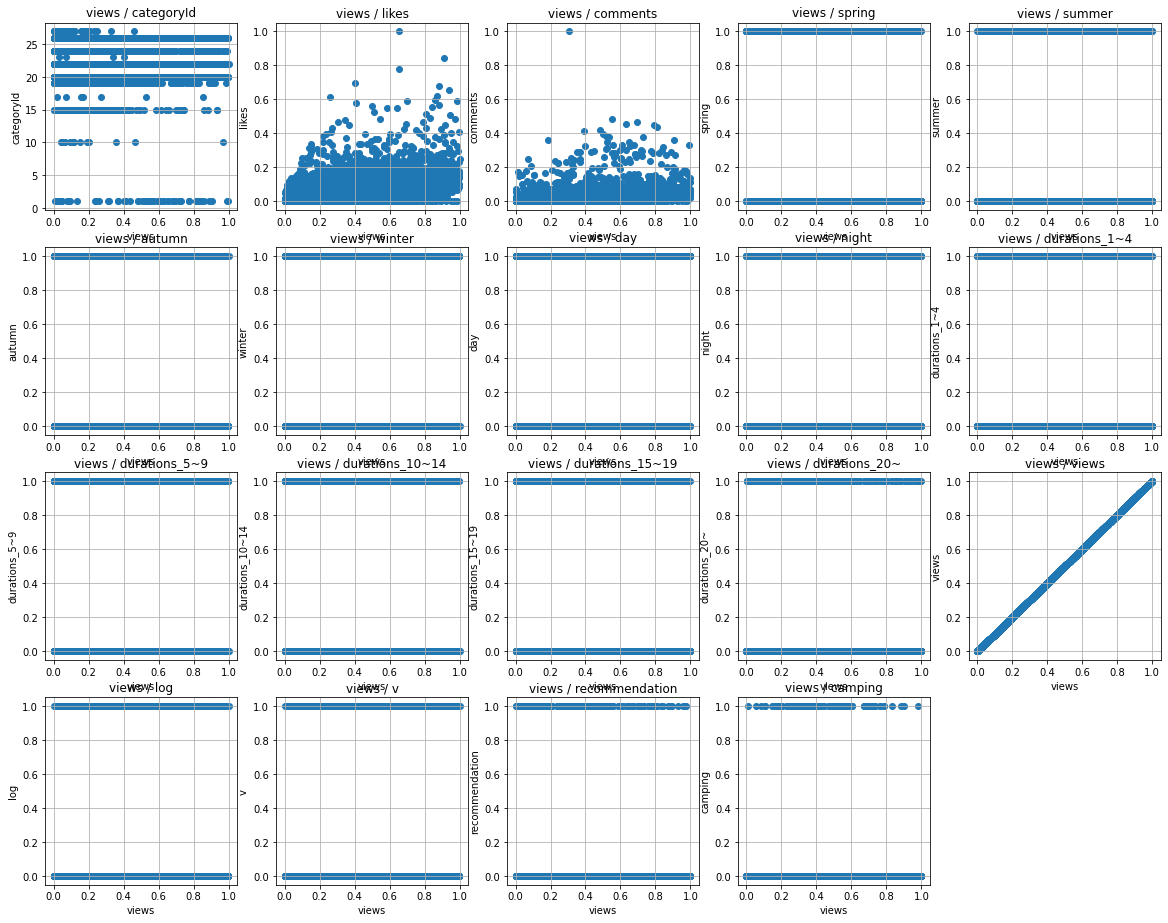

In [ ]:
plt.figure(figsize = (20, 20))

for i in range(1, len(df.describe().columns) - 1 ):
    plt.subplot(5, 5, i)
    plt.title("views / {}".format(df.describe().columns[i]))
    plt.xlabel("views")
    plt.ylabel(df.describe().columns[i])
    plt.scatter(x = df["views"].loc[df["views"] <= 1000000], y = df[df.describe().columns[i]].loc[df["views"] <= 1000000])
    plt.grid()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
X = norm_df.drop('views', axis = 1)
X = X.drop('title',axis = 1)
X = X.drop('publishedAt', axis = 1)
y = norm_df['views']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 20)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=20)

#regressor_rbf = SVR(kernel = 'rbf', C = 500)
#regressor_linear = SVR(kernel = 'linear', C = 100)
#regressor_poly = SVR(kernel = 'poly', C = 500)
#regressor_rbf.fit(X, y)
#regressor_linear.fit(X_train, y_train)
#regressor_poly.fit(X, y)

#print("X_train's shape : ", X_train.shape)
#print("y_train's shape : ", y_train.shape)
#print("\nX_val's shape : ", X_val.shape)
#print("y_val's shape : ", y_val.shape)
#print("\nX_test's shape : ", X_test.shape)
#print("y_test's shape : ", y_test.shape)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)

param_grid = [
    {'kernel': ['linear'], 'C': [1.,10., 30., 100.]},
    {'kernel': ['rbf'], 'C': [1., 10., 30., 100.],
                        'gamma': [0.01, 0.1, 1.,100.]},
]

svm_reg=SVR()

grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring="r2", verbose=2)
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...............................C=1.0, kernel=linear; total time=   2.7s
[CV] END ...............................C=1.0, kernel=linear; total time=   2.5s
[CV] END ...............................C=1.0, kernel=linear; total time=   2.5s
[CV] END ...............................C=1.0, kernel=linear; total time=   2.4s
[CV] END ...............................C=1.0, kernel=linear; total time=   2.5s
[CV] END ..............................C=10.0, kernel=linear; total time=  15.7s
[CV] END ..............................C=10.0, kernel=linear; total time=  17.2s
[CV] END ..............................C=10.0, kernel=linear; total time=  16.7s
[CV] END ..............................C=10.0, kernel=linear; total time=  16.1s
[CV] END ..............................C=10.0, kernel=linear; total time=  15.7s
[CV] END ..............................C=30.0, kernel=linear; total time=  39.5s
[CV] END ..............................C=30.0, 

In [ ]:
model=SVR(kernel='rbf',C=30,gamma=0.1)
model.fit(X_train,y_train)

test_r2=model.score(X_test,y_test)

print('SVR 모델의 R2 score = ',test_r2)

SVR 모델의 R2 score =  0.46622260113302916


In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid = [
        {'n_estimators': [3,10,20,30,40,50], 'max_features': [2, 4, 6, 8, 10, 12]},
    ]
forest_reg = RandomForestRegressor()
 
grid_search2 = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
 
grid_search2.fit(X_train, y_train)

print(grid_search2.best_params_)
print(grid_search2.best_score_)

#estimators_list=[10,20,30,40]

#for i in estimators_list:
#  model = RandomForestRegressor(n_estimators = i, random_state = 15)
  

{'max_features': 8, 'n_estimators': 50}
0.6178199318228191


In [ ]:
model2=RandomForestRegressor(n_estimators=50,max_features=8)
model2.fit(X_train,y_train)

test2_r2=model2.score(X_test,y_test)

print('Random forest regression 모델의 R2 score = ',test2_r2)

Random forest regression 모델의 R2 score =  0.587503263945623


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
param_grid = {'alpha':[0.01,0.1,1,10,100]}
grid_search3 = GridSearchCV(ridge, param_grid, cv=5, scoring='r2') 

grid_search3.fit(X_train, y_train)

print(grid_search3.best_params_)
print(grid_search3.best_score_)

{'alpha': 1}
0.32531225801043506


In [ ]:
model3=Ridge(alpha=1)
model3.fit(X_train,y_train)

test3_r2=model3.score(X_test,y_test)

print('Ridge regression 모델의 R2 score = ',test3_r2)

Ridge regression 모델의 R2 score =  0.33192717243682623


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
param_grid = {'alpha':[0.01,0.1,1,10,100]}
grid_search4 = GridSearchCV(lasso, param_grid, cv=5, scoring='r2') 

grid_search4.fit(X_train, y_train)

print(grid_search4.best_params_)
print(grid_search4.best_score_)

{'alpha': 0.01}
0.042921791549319056


In [ ]:
model4=Lasso(alpha=0.01)
model4.fit(X_train,y_train)

test4_r2=model4.score(X_test,y_test)

print('Lasso regression 모델의 R2 score = ',test4_r2)

Lasso regression 모델의 R2 score =  0.03120816089449896


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
model_linear_pred = model_linear.predict(X_test)

print('Linear Regression 모델의 R2 score: ', model_linear.score(X_test, y_test))

Linear Regression 모델의 R2 score:  0.3318925654929985
